# Car Price Prediction

Let's do a full Polynomial Regression project on Car Price Prediction — a very relevant and real-world problem, especially for online car marketplaces (like OLX, CarDekho, Cars24, etc.).

 ## Problem Statement
"Predict the selling price of a car based on its features like age, mileage, horsepower, and engine size."

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Sample Car Dataset (20 rows)
# Simulate car data
data = pd.DataFrame({
    'car_age':       [1, 2, 3, 5, 7, 8, 10, 12, 14, 15, 3, 4, 6, 8, 10, 11, 13, 15, 2, 5],
    'mileage_km':    [15000, 25000, 32000, 50000, 70000, 80000, 100000, 120000, 140000, 150000,
                      31000, 40000, 60000, 85000, 95000, 110000, 125000, 145000, 27000, 55000],
    'engine_cc':     [1200, 1500, 1300, 1600, 1400, 1500, 1800, 2000, 2200, 2400,
                      1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 1250, 1550],
    'horsepower':    [85, 100, 95, 110, 105, 100, 120, 130, 135, 140,
                      92, 97, 103, 108, 115, 118, 125, 130, 90, 102],
    'selling_price': [6.5, 6.0, 5.5, 5.0, 4.5, 4.0, 3.8, 3.5, 3.0, 2.8,
                      5.4, 5.2, 4.8, 4.2, 3.9, 3.6, 3.3, 2.9, 6.2, 5.1]  # in lakhs
})


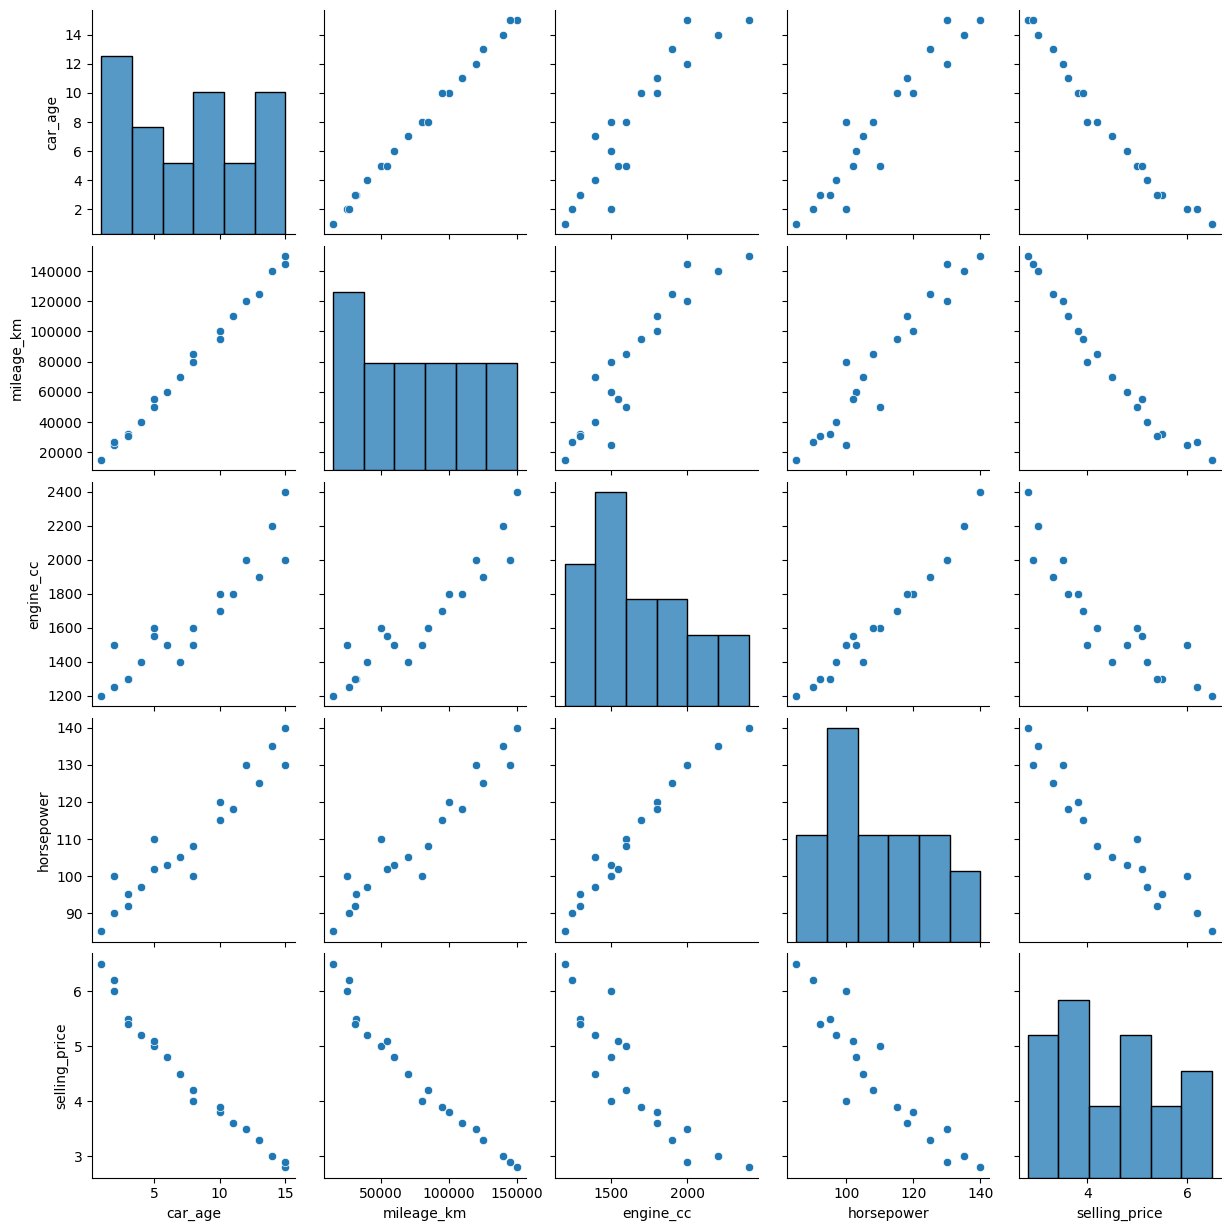

         car_age     mileage_km    engine_cc  horsepower  selling_price
count  20.000000      20.000000    20.000000   20.000000      20.000000
mean    7.700000   77750.000000  1645.000000  110.000000       4.460000
std     4.589462   43641.934204   327.229197   15.934075       1.129695
min     1.000000   15000.000000  1200.000000   85.000000       2.800000
25%     3.750000   38000.000000  1400.000000   99.250000       3.575000
50%     7.500000   75000.000000  1575.000000  106.500000       4.350000
75%    11.250000  112500.000000  1825.000000  121.250000       5.250000
max    15.000000  150000.000000  2400.000000  140.000000       6.500000


In [3]:
# EDA
sns.pairplot(data)
plt.show()

print(data.describe())


In [4]:
# Feature & Target Split
X = data[['car_age', 'mileage_km']]
y = data['selling_price']



In [5]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
# Polynomial Regression (Degree 2)
# Create polynomial model (degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

# Predict
y_pred = poly_model.predict(X_test)


In [7]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 4))


RMSE: 0.13
R² Score: 0.9926


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


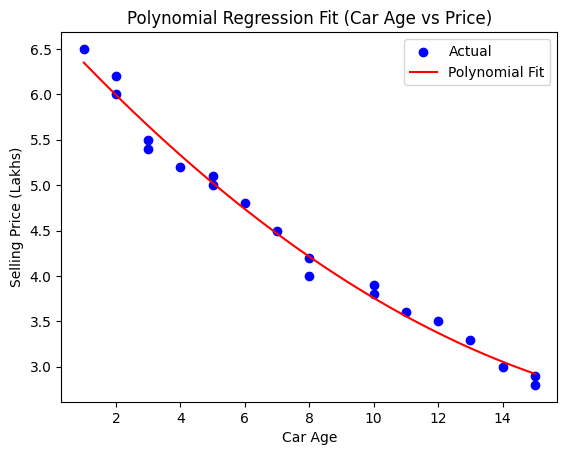

In [8]:
# Visualize Predictions (1 Feature Only for Curve)
# If you want to visualize curve fit, try with just car_age.

X_age = data[['car_age']]
y_price = data['selling_price']

# Re-fit only on car_age for plotting
poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly.fit(X_age, y_price)

X_range = np.linspace(X_age.min(), X_age.max(), 100).reshape(-1, 1)
y_range_pred = poly.predict(X_range)

# Plot
plt.scatter(X_age, y_price, color='blue', label='Actual')
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Fit')
plt.xlabel('Car Age')
plt.ylabel('Selling Price (Lakhs)')
plt.title('Polynomial Regression Fit (Car Age vs Price)')
plt.legend()
plt.show()


| 🔍 Insight                          | ✅ Description                                                  |
| ----------------------------------- | -------------------------------------------------------------- |
| Non-linear relation                 | Price declines slower for newer cars, faster after certain age |
| Use polynomial for 1–2 key features | Avoid overfitting with high dimension                          |
| Use `make_pipeline()`               | Clean implementation                                           |
| Best for 1D/2D cases                | Not scalable for high-dimensional datasets                     |


| ✅ Pros                               | ❌ Cons                                |
| ------------------------------------ | ------------------------------------- |
| Models non-linearity in a simple way | Overfits if degree too high           |
| Easy to visualize for 1 feature      | Less interpretable with many features |
| Good for quick curve fitting         | Poor generalization with noise        |
